<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [6]:
hh_base = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [7]:
print(hh_base.head(10))

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
5    Мужчина ,  29 лет , родился 5 октября 1989   25000 руб.   
6  Мужчина ,  46 лет , родился 19 сентября 1972  250000 руб.   
7       Мужчина ,  29 лет , родился 9 июля 1989   70000 руб.   
8      Мужчина ,  29 лет , родился 11 июля 1989   65000 руб.   
9      Мужчина ,  34 года , родился 26 мая 1984   55000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4              

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [8]:
print(hh_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [9]:
print(hh_base.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
# Будем искать подстроки в исходной строке и в зависимости от этого установим категорию образования
def education_cat(education_str):
    
    if education_str.find('Неоконченное высшее образование') != -1:
        return 'неоконченное высшее'
    elif education_str.find('Высшее образование') != -1:
        return 'высшее'
    elif education_str.find('Среднее специальное образование') != -1:
        return 'среднее специальное'
    elif education_str.find('Среднее образование') != -1:
        return 'среднее'
    else:
        return 'прочее'
    
# Применим функцию к новому столбцу "Образование", выведем полученный столбец и удалим исходный
hh_base['Образование'] = hh_base['Образование и ВУЗ'].apply(education_cat)     
print(hh_base['Образование'].value_counts())
hh_base = hh_base.drop(['Образование и ВУЗ'], axis=1)
        

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
# Метод split() делит исходное поле на слова, получается список 
# ['Мужчина', ',', '50', 'лет', ',', 'родился', '25', 'июня', '1968']

hh_base['Пол'] = hh_base['Пол, возраст'].apply(lambda x: x.split()[0])          
hh_base['Возраст'] = hh_base['Пол, возраст'].apply(lambda x: int(x.split()[2]))

# Процент женских и мужских резюме
print(hh_base['Пол'].value_counts(normalize=True)*100)
# Средний возраст соискателей
print(hh_base['Возраст'].mean())

# Удалим исходный признак
try:
    hh_base = hh_base.drop('Пол, возраст', axis=1)
except:
    'Column has already been deleted'    
#print(hh_base.info())

Мужчина    80.929287
Женщина    19.070713
Name: Пол, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
# Опишем функцию для подсчёта опыта в месяцах
def experience_months(str_experience):

    # Преобразуем аргумент в строку и обрежем
    str_experience = str(str_experience)
    str_experience = str_experience[:40]    
    # Список вида ['Опыт', 'работы', '1', 'год', '1', 'месяц', 'Август', '2010', '—', 'п...']
    splited = str_experience.split()

    # Все варианты слов для описания опыта в годах и месяцах
    list_years = ['год', 'года', 'лет']
    list_months = ['месяц', 'месяца', 'месяцев']
    experience = 0

    # Находим эти варианты в списке и подсчитываем опыт в месяцах
    # Использовала блок обработки исключений, так как иногда встречалась ошибка "index out of range", 
    # и не получалось её отследить по-другому
    try:
        # ищем опыт в годах
        if splited[3] in list_years:
            experience += int(splited[2])*12
        # ищем опыт в месяцах при наличии опыта больше года
        if splited[5] in list_months:
            experience += int(splited[4])
        # если опыт меньше года
        if splited[3] in list_months:
            experience += int(splited[2])
    
        return experience
    except:
        return np.nan

# Создаём новый столбец, удаляем исходный
hh_base['Опыт работы (месяц)'] = hh_base['Опыт работы'].apply(experience_months)
hh_base = hh_base.drop('Опыт работы', axis=1)
#print(hh_base['Опыт работы (месяц)'].value_counts())
#print(hh_base.info())
print(hh_base['Опыт работы (месяц)'].median())

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
# Город
def find_city(str_city):
    
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    # Выделяем первое слово в аргументе и определяем категорию
    city = str(str_city).split()[0]
    if city == 'Москва':
        return 'Москва'
    if city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    if city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    
hh_base['Город'] = hh_base['Город, переезд, командировки'].apply(find_city)

# Процентные соотношения жителей разных городов
print(hh_base['Город'].value_counts(normalize=True)*100)


# Переезд
def relocation(str_city):
    
    # Получим список вида ['Москва ', ' м. Беломорская ', ' не готов к переезду', ' не готов к командировкам']
    splited = str(str_city).split(',')
    
    # Информация о переезде - элемент с идексом 2, если предыдущий - метро, либо элемент с индексом 1
    if splited[1].find('м.') != -1:
        ind = 2
    else:
        ind = 1
    
    # По наличию предлога "не" определяем готовность        
    if splited[ind].find('не') == -1:
        return True
    else:
        return False

hh_base['Готовность к переезду'] = hh_base['Город, переезд, командировки'].apply(relocation)
print(hh_base['Готовность к переезду'].value_counts(normalize=True)*100)


# Командировки
def business_trips(str_city):
    
    # Получим список вида ['Москва ', ' м. Беломорская ', ' не готов к переезду', ' не готов к командировкам']
    splited = str(str_city).split(',')
    
    # Информация - элемент с идексом 3, если первый - метро, либо элемент с индексом 2
    if splited[1].find('м.') != -1:
        ind = 3
    else:
        ind = 2
            
    # По наличию предлога "не" определяем готовность
    if splited[ind].find('не') == -1:
        return True
    else:
        return False

hh_base['Готовность к командировкам'] = hh_base['Город, переезд, командировки'].apply(business_trips)
print(hh_base['Готовность к командировкам'].value_counts(normalize=True)*100)

# Устанавливаем фильтр "два поля = True", печатаем процентное соотношение и удаляем столбцы
mask = (hh_base['Готовность к переезду'] & hh_base['Готовность к командировкам'])
print(hh_base[mask].shape[0] / hh_base.shape[0] * 100)

hh_base = hh_base.drop(['Город, переезд, командировки'], axis=1)
                    

Москва              37.146880
другие              36.769176
город миллионник    15.050063
Санкт-Петербург     11.033882
Name: Город, dtype: float64
False    64.220901
True     35.779099
Name: Готовность к переезду, dtype: float64
True     71.330234
False    28.669766
Name: Готовность к командировкам, dtype: float64
32.4445735741105


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
# Занятость: ищем проектную работу и волонтерство
hh_base['Проектная работа'] = hh_base['Занятость'].apply(lambda x: str(x).find('проектная работа') != -1)
hh_base['Волонтерство'] = hh_base['Занятость'].apply(lambda x: str(x).find('волонтерство') != -1)

# Устанавливаем фильтр "два поля = True", печатаем количество строк и удаляем столбцы
mask = (hh_base['Проектная работа'] & hh_base['Волонтерство'])
print(hh_base[mask].shape[0])
hh_base = hh_base.drop(['Проектная работа', 'Волонтерство'], axis=1)

# График: ищем вахтовый метод и гибкий график
hh_base['Вахтовый метод'] = hh_base['График'].apply(lambda x: str(x).find('вахтовый метод') != -1)
hh_base['Гибкий график'] = hh_base['График'].apply(lambda x: str(x).find('гибкий график') != -1)

# Устанавливаем фильтр "два поля = True", печатаем количество строк и удаляем столбцы
mask = (hh_base['Вахтовый метод'] & hh_base['Гибкий график'])
print(hh_base[mask].shape[0])
hh_base = hh_base.drop(['Вахтовый метод', 'Гибкий график'], axis=1)

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
# Проверка структуры полученной таблицы
print(hh_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Пол                              44744 non-null  object 
 10  Возраст                          44744 non-null  int64  
 11  Опыт работы (месяц)              44394 non-null  float64
 12  Город             

In [16]:
# Работаем с таблицей валют
ex_rates = pd.read_csv('data\ExchangeRates.csv')

# Преобразуем даты в формат pd.datetime
hh_base['Обновление резюме'] = pd.to_datetime(hh_base['Обновление резюме'])
hh_base['date'] = hh_base['Обновление резюме'].dt.date
hh_base['date'] = pd.to_datetime(hh_base['date'])
ex_rates['date'] = pd.to_datetime(ex_rates['date'])

# Столбец ЗП разделим на две части - сумму и валюту.
hh_base['ЗП сумма'] = hh_base['ЗП'].apply(lambda x: int(str(x).split()[0])) # сохраним в числовом виде
hh_base['currency'] = hh_base['ЗП'].apply(lambda x: str(x).split()[1])
#print(hh_base['currency'].value_counts())

# Переведём наименование валюты в формат ISO
curr = {'руб.': 'RUR', 'грн.':	'UAH', 'USD': 'USD', 'EUR': 'EUR',
        'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум':	'UZS', 'AZN':	'AZN',
        'KZT': 'KZT', 'руб.': 'RUR'}
hh_base['currency'] = hh_base['currency'].apply(lambda x: curr[x])

# Объединение таблиц и вывод на печать количества строк в исходной и объединённой, для проверки
merged = hh_base.merge(ex_rates, left_on=['currency', 'date'], right_on = ['currency', 'date'], how = 'left')

# Поле close, proportion для рубля заполним единицей в случае пустых значений (для рубля)
# Количество пустых значений (2273) в этих полях равно количеству строк, где валюта равна рублю
values = {'close': 1, 'proportion': 1}
merged = merged.fillna(values)

# Расчёт ЗП в рублях, вывод медианы
merged['ЗП (руб)'] = merged['ЗП сумма'] * merged['close'] / merged['proportion']
print(merged['ЗП (руб)'].median())

# Удаление служебных столбцов из объединённой таблицы 
hh_base = merged.drop(['ЗП', 'date', 'ЗП сумма', 'currency', 'per', 'time', 'close', 'vol', 'proportion'], axis=1)


59019.0


In [17]:
# Проверка структуры полученной таблицы
print(hh_base.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Занятость                        44744 non-null  object        
 2   График                           44744 non-null  object        
 3   Последнее/нынешнее место работы  44743 non-null  object        
 4   Последняя/нынешняя должность     44742 non-null  object        
 5   Обновление резюме                44744 non-null  datetime64[ns]
 6   Авто                             44744 non-null  object        
 7   Образование                      44744 non-null  object        
 8   Пол                              44744 non-null  object        
 9   Возраст                          44744 non-null  int64         
 10  Опыт работы (месяц)              44394 non-null  float64  

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [18]:
fig = px.histogram(
    data_frame=hh_base, 
    x='Возраст', #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение возраста соискателей', #заголовок,
    nbins=25
)
fig.write_image('data/img11.png')
#fig.show()

print(hh_base['Возраст'].mode())

0    30
dtype: int64


![](data/img11.png)

Распределение возраста соискателей имеет вид лог-нормального. Наибольшее количество людей в возрасте от 25 до 34 лет (два центральных столбца).
Можно отметить, что со снижением возраста количество соискателей стремительно снижается.
Видны выбросы (возраст около 0 или выше 100), требуется дополнительное исследование, похоже на ошибки в данных.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [19]:
fig = px.histogram(
    data_frame=hh_base, 
    x='Опыт работы (месяц)', #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение опыта работы соискателей (в месяцах)', #заголовок,
    nbins=25
)
fig.write_image('data/img12.png')
#fig.show()

print(hh_base['Опыт работы (месяц)'].max())

1188.0


![](data/img12.png)

Распределение опыта работы в месяцах также похоже на лог-нормальное. Наибольшее количество людей имеет опыт работы 50-99 мес (примерно 4-8 лет).
Опыт работы свыше 250 мес (более 20 лет) я бы исследовала дополнительно.
1 строка, в котрой указан опыт свыше 1150 мес, выглядит как аномалия.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [20]:
fig = px.histogram(
    data_frame=hh_base, 
    x='ЗП (руб)', #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение желаемой заработной платы соискателей (в рублях)', #заголовок,
    nbins=40
)
fig.write_image('data/img13.png')
#fig.show()

filtered = hh_base[hh_base['ЗП (руб)'] < 500000 ]
fig = px.histogram(
    data_frame=filtered, 
    x='ЗП (руб)', #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение желаемой заработной платы соискателей до 500 тыс. руб.', #заголовок,
    nbins=25
)
fig.write_image('data/img14.png')
#fig.show()

![](data/img13.png)
![](data/img14.png)

Большая часть данных сосредоточена в одном столбце. Поэтому отфильтруем их и построим ещё один график распределения.
Выбросы требуют дополнительного исследования, похоже на аномалию в данных: цифры свыше 5 млн руб возможно указаны как зарплата за год, либо другая ошибка. Также есть отрицательные значения зарплаты.

Отбор по критерию "Желаемая ЗП в рублях меньше 500 тыс." показывает, что в этом интервале распределение зарплат близко к лог-нормальному.
Также можно отметить выбросы и исследовать их дополнительно, но цифра 400 тыс руб в месяц - реальная зарплата например для топ-менеджера.
Большая часть соискателей ожидает зарплату от 20 до 60 тыс руб в месяц.
Со снижением уровня ЗП количество соискателей c соответствующими зарплатными ожиданиями сильно снижается.
Столбец со значением "0-20 тыс" также привлекает внимание, может быть предметом для дополнительных исследований (возможно частичная занятость или труд, не требующий высокой квалификации).

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [21]:
filtered = hh_base[hh_base['ЗП (руб)'] < 1000000 ]

grouped = filtered.groupby(['Образование'])['ЗП (руб)'].median()
print(grouped)

fig = px.bar(
    data_frame=grouped,
    x=grouped.index,
    y='ЗП (руб)',
    height=500, #высота
    width=700, #ширина
    title='Зависимость медианной желаемой ЗП ( < 1млн.руб.) от уровня образования'
)
fig.write_image('data/img15.png')
#fig.show()

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


![](data/img15.png)

Наблюдается прямая зависимость зарплатных ожиданий соискателей от уровня образования: чем выше уровень образования, тем выше уровень медианной желаемой ЗП.
Для людей со средним и средним специальным образованием видим равные значения, возможно эти категории можно объединить в одну для целей прогнозирования ЗП.
Образование является одним из ключевых признаков при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [22]:
filtered = hh_base[hh_base['ЗП (руб)'] < 1000000 ]

fig = px.box(
    data_frame=filtered,
    x='ЗП (руб)', #ось абсцисс
    color='Город',
    height=500, #высота
    width=700, #ширина
    title='Распределение желаемой ЗП (< 1 млн.руб.) в зависимости от города', 
)

fig.write_image('data/img16.png')
#fig.show()

![](data/img16.png)

Данные по категориям "город миллионник" и "другие" имеют похожие характеристики распределения - примерно равны значения 25 и 75 квантилей (30-60 тыс руб), максимум (110 тыс руб) и медианная ЗП (40 тыс руб).
При этом в категории "другие" значительно больше выбросов.

Зарплатные ожидания соискателей в Санкт-Петербурге отличаются в того, что мы наблюдали в двух категориях, указанных выше. Медианная ЗП на 50% выше (60 тыс руб). Значения квантилей сдвинуты вправо, то есть большая часть ожидаемых ЗП лежит в другом интервале (45-85 тыс руб). 

Москва: ещё более существенные отличия, медианная ЗП 85 тыс руб, более чем в два раза превышает аналогичное значение для городов миллионников и прочих. Более заметный разброс ЗП, расстояние между 25 и 75 квантилями (60-150 тыс), большое количество выбросов. Очень сильно выделяется условный максимум ЗП по Москве (290 тыс в сравнении с 110 тыс в Петербурге и 110 тыс в других городах).

Можно сделать вывод, что признак Город очень важен при прогнозировании ЗП, в случае если город - это Москва или Санкт-Петербург, так как данные по двум столицам сильно отличаются от того, что мы наблюдаем в регионах. При этом ожидания по ЗП в Москве и Санкт-Петербурге также сильно отличаются между собой.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [23]:

import plotly.graph_objects as go

grouped_reloc = hh_base.groupby(['Готовность к переезду'])[['ЗП (руб)']].median()
grouped_trips = hh_base.groupby(['Готовность к командировкам'])[['ЗП (руб)']].median()
print(grouped_reloc)
print(grouped_trips)

# Создадим единый график
fig = go.Figure()

# и добавим на него отдельно данные по готовности командировкам, и отдельно - по готовности переезду
fig.add_trace(go.Histogram(histfunc='sum', x=grouped_reloc.index, y=grouped_reloc['ЗП (руб)'], name='Переезд'))
fig.add_trace(go.Histogram(histfunc='sum', x=grouped_trips.index, y=grouped_trips['ЗП (руб)'], name='Командировки'))

fig.update_layout(height=500, width = 700, title='Зависимость ЗП от мобильности кандидатов')
fig.write_image('data/img17.png')
#fig.show()

# Медиана ЗП самых мобильных соискателей
mask = (hh_base['Готовность к переезду'] & hh_base['Готовность к командировкам'])
print(hh_base[mask]['ЗП (руб)'].median())

                       ЗП (руб)
Готовность к переезду          
False                   50000.0
True                    64517.1
                            ЗП (руб)
Готовность к командировкам          
False                        40000.0
True                         64679.4
65000.0


![](data/img17.png)

Медиана около 64.5 тыс руб для людей, готовых к переезду или командировкам.
Люди, вообще не готовые куда-либо перемещаться, даже временно (в комадировки), имеют ожидания на треть ниже - 40 тыс руб.
Для кандидатов, готовых к переезду, медиана ЗП находится между этими значениями.
Делаем вывод, что в среднем чем выше уровень мобильности человека, тем более высокими являюстся его зарплатные ожидания.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

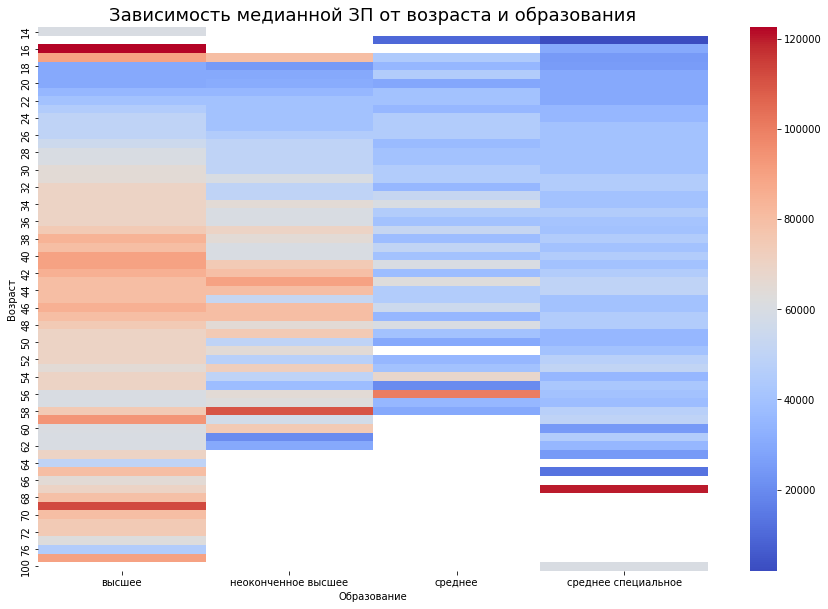

In [24]:
pivot = hh_base.pivot_table(values ='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

plt.figure(figsize=(15,10))
heatmap = sns.heatmap(data=pivot, cmap='coolwarm')
heatmap.set_title('Зависимость медианной ЗП от возраста и образования', fontsize=18);

Соискатели с высшим образованием: от 18 до 40 лет ожидания ЗП растут с возврастом, можно предположить что это связано с ростом опыта кандидатов. Наблюдается возможная аномалия: возраст 14-16 лет, в котором вряд ли человек мог успеть закончить ВУЗ, и максимальная ожидаемая ЗП для возраста 16 лет. Начиная с возраста 40-50 лет, сложно проследить зависимость ожидаемой ЗП от возраста, предположительно потому, что часть кандидатов движется по карьерной лестнице к директорским позициям, другая часть продолжает работать как специалисты, уровень ЗП соответственно разный. В целом по этой категории самые высокие зарплатные ожидания.

Неоконченное высшее образование: также прослеживается зависимость ЗП от возраста примерно до 40 с небольшим лет, далее она рассеивается. Привлекают внимание высокие ожидания по ЗП для кандидатов 58 лет и очень низкие для 62 лет.

Для кандидатов со средним образованием сложно проследить какую-то зависимость, в целом ожидания по ЗП ниже, чем в предыдущих двух категориях. Тепловая карта окрашена довольно хаотично. Есть пропуски в данных (кандидаты 50-52 лет). В целом уровень ЗП по данной категории невысокий, за исключением соискателей в возрасте 56-58 лет.

Среднее специальное образование: есть некоторая зависимость ЗП от возраста, примерно до 30-40 лет. В целом уровень ожидаемой ЗП в небольшом диапазоне (примерно до 60 тыс, нижняя часть шкалы тепловой карты). Для кандидатов в возрасте 60 лет видим и максимальные, и минимальные ожидания ЗП, что требует внимания, также заметны пропуски в данных. В целом по этой категории самые низкие зарплатные ожидания. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [25]:
# Создадим дополнительное поле, удалим в конце блока кода
hh_base['Опыт работы (лет)'] = hh_base['Опыт работы (месяц)'].apply(lambda x: x/12)

import plotly.graph_objects as go

# Диаграмма рассеяния, зависимость опыта работы от возраста
fig1 = px.scatter(
    data_frame=hh_base,
    x='Возраст', 
    y='Опыт работы (лет)')

# Линейная диаграмма, у=х, минимум и максимум определены исходя из данных fig1
df_xy = pd.DataFrame({
    'X': [0,10,20,30,40,50,60,70,80,90,100],
    'Y': [0,10,20,30,40,50,60,70,80,90,100]})
fig2 = px.line(df_xy, x='X', y='Y')

# Объединение двух графиков в один
fig = go.Figure(data = fig1.data + fig2.data)
fig.update_layout(height=500, width = 700, title='Взаимосвязь опыта работы и возраста')
fig.write_image('data/img18.png')
#fig.show()

# Удаление служебного столбца
hh_base = hh_base.drop(['Опыт работы (лет)'], axis=1)


![](data/img18.png)

Верхняя граница распределения практически параллельна линии "возраст = опыт работы", это отражает тот факт, что большинство людей не начинает карьеру до окончания ВУЗа или средне-специального учебного заведения, примерно до возраста 20 лет.

Другие зависимости проследить сложно. Например для возраста 40 лет опыт работы варьируется от 0 до 27 лет. Плотность распределения растёт с увеличением опыта, но незначительно. Возможно кандидаты не полностью раскрывают свой опыт в резюме.
Анализируя пограничные значения, видим такие ситуации, когда человек начинал работать в несовершеннолетнем возрасте. Также имеются явные выбросы, несколько ситуаций, в которых рассчитанный опыт работы превышает возраст.

Для возраста свыше 55 лет диаграмма теряет свою плотность и структуру. Таких людей в базе значительно меньше, и опыт работы они указывают совершенно разный.
Кандидат в возрасте 100 лет - также очень вероятная ошибка в данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [26]:
# Проанализируем распределение зарплат до 500 тыс руб в разрезе пола кандидатов
filtered = hh_base[hh_base['ЗП (руб)'] < 500000]
data_women = filtered[filtered['Пол'] == 'Женщина']
data_men = filtered[filtered['Пол'] == 'Мужчина']

# Создадим единый график
fig = go.Figure()

# и добавим на него отдельно данные по мужчинам и женщинам
fig.add_trace(go.Histogram(x=data_women['ЗП (руб)'], name='Женщины', xbins=dict(start=0, end=500000, size=50000)))
fig.add_trace(go.Histogram(x=data_men['ЗП (руб)'], name='Мужчины', xbins=dict(start=0, end=500000, size=50000)))

fig.update_layout(barmode='overlay', width=700, height=500, title='Распределение зарплат (< 500 тыс руб) в разрезе пола')
fig.update_traces(opacity=0.5)
#fig.show()
fig.write_image('data/img19.png')

# Зависимость зарплатных ожиданий от пола и образования
filtered = hh_base[hh_base['ЗП (руб)'] < 1000000 ]
grouped = filtered.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
fig = px.bar(data_frame=grouped, y='ЗП (руб)', x='Образование', color='Пол', barmode='group',
             title='Зависимость ЗП (< 1 млн ) от пола и уровня образования', width=700, height=500)
#fig.show()
fig.write_image('data/img20.png')


![](data/img19.png)
![](data/img20.png)

Моя идея - детализировать по признаку Пол приведённые графики распределения зарплат (меньше 500 тыс руб, чтобы исключить выбросы), и зависимости ЗП от уровня образования.
Распределение ожидаемых ЗП для женщин отличается, оно более сглаженное.
Основные причины полагаю что следующие: женских резюме в несколько раз меньше (примерно пятая часть от общего количества), и в целом зарплатные ожидания женщин ниже.
Мы можем это увидеть на втором графике.
В любой категории образования женщины-кандидаты претендуют на меньшую ЗП, чем мужчины. Самая большая разница наблюдается для людей со средним образованием, она составляет более 30 процентов.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [27]:
# Включаем в поиск все столбцы, находим дубликаты
dupl_columns = list(hh_base.columns)
mask = hh_base.duplicated(subset=dupl_columns)
hh_duplicates = hh_base[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

# Удаляем и печатаем итог
hh_dedupped = hh_base.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Число найденных дубликатов: 156
Результирующее число записей: 44588


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [28]:
cols_null_count = hh_base.isnull().sum()
print(cols_null_count)


Ищет работу на должность:            0
Занятость                            0
График                               0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                350
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
ЗП (руб)                             0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [29]:
# Удалим все строки с пропусками в двух столбцах. Было 44 744 строки
hh_base = hh_base.dropna(subset=['Последнее/нынешнее место работы'], how='all', axis=0)
hh_base = hh_base.dropna(subset=['Последняя/нынешняя должность'], how='all', axis=0)

# Заполним пропуски опыта работы медианой
values = {'Опыт работы (месяц)': hh_base['Опыт работы (месяц)'].median()}
hh_base = hh_base.fillna(values)
print(hh_base['Опыт работы (месяц)'].mean())

# Проверка структуры данных и количества строк
print(hh_base.info())

114.61047785078897
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44742 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44742 non-null  object        
 1   Занятость                        44742 non-null  object        
 2   График                           44742 non-null  object        
 3   Последнее/нынешнее место работы  44742 non-null  object        
 4   Последняя/нынешняя должность     44742 non-null  object        
 5   Обновление резюме                44742 non-null  datetime64[ns]
 6   Авто                             44742 non-null  object        
 7   Образование                      44742 non-null  object        
 8   Пол                              44742 non-null  object        
 9   Возраст                          44742 non-null  int64         
 10  Опыт работы (месяц)              44742 

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [30]:
# Выведем на печать выбросы согласно условию
mask = ((hh_base['ЗП (руб)'] > 1e6) | (hh_base['ЗП (руб)'] < 1000))
print(hh_base[mask].shape[0])

# Оставим в DataFrame остальные строки
mask = ((hh_base['ЗП (руб)'] <= 1e6) & (hh_base['ЗП (руб)'] >= 1000))
hh_base = hh_base[mask]


89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [31]:
# Выведем на печать выбросы согласно условию
mask = (hh_base['Опыт работы (месяц)']/12 > hh_base['Возраст'])
print(hh_base[mask].shape[0])

# Оставим в DataFrame остальные строки
mask = (hh_base['Опыт работы (месяц)']/12 <= hh_base['Возраст'])
hh_base = hh_base[mask]


7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

In [32]:
# Логарифмирование признака Возраст и построение распределения
hh_base['log_age']= np.log(hh_base['Возраст'])
fig = px.histogram(
    x=hh_base['log_age'], #ось абсцисс
    height=500, #высота
    width=700, #ширина
    title='Распределение логарифма возраста соискателей', #заголовок,
    nbins=25
)
fig.write_image('data/img21.png')
#fig.show()

# Расчёт выбросов по медоду z-отклонений и удаление выбросов
x = hh_base['log_age']
mu = x.mean()
sigma = x.std()
lower_bound = mu - 3 * sigma  
upper_bound = mu + 4 * sigma # послабление на 1 сигму в правую сторону - противоположную ассимметрии распределения
outliers = hh_base[(x < lower_bound) | (x > upper_bound)]
hh_base = hh_base[(x > lower_bound) & (x < upper_bound)]

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {hh_base.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44643


![](data/img21.png)